In [1]:
import pandas as pd
from os.path import isfile, join
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scp

C:\Users\Asus\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Asus\anaconda3\lib\site-packages\numpy\.libs\libopenblas.fb5ae2tyxyh2ijrdkgdgq3xbklktf43h.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
datafiles = [join('.\\data', f) for f in listdir('./data') if join('./data', f).endswith(".csv")]

In [3]:
datafiles

['.\\data\\Guess_1167_part0_2025-07-02_18h08.55.968.csv',
 '.\\data\\Guess_1167_part1_part2_2025-07-02_18h32.03.916.csv',
 '.\\data\\Guess_1167_sm_2025-07-02_19h13.56.366.csv',
 '.\\data\\Guess_2172_part0_2025-06-23_15h31.44.862.csv',
 '.\\data\\Guess_2172_part1_part2_2025-06-23_15h46.32.531.csv',
 '.\\data\\Guess_2172_sm_2025-06-23_16h27.15.471.csv',
 '.\\data\\Guess_2405_part0_2025-06-18_18h53.06.633.csv',
 '.\\data\\Guess_2405_part1_part2_2025-06-18_19h05.06.793.csv',
 '.\\data\\Guess_2405_sm_2025-06-18_19h52.42.236.csv',
 '.\\data\\Guess_3084_part0_2025-05-30_12h54.23.016.csv',
 '.\\data\\Guess_3084_part0_2025-05-30_13h02.37.105.csv',
 '.\\data\\Guess_3084_part1_part2_2025-05-30_13h16.54.106.csv',
 '.\\data\\Guess_3084_sm_2025-05-30_14h00.35.729.csv',
 '.\\data\\Guess_4110_part0_2025-06-06_12h56.37.524.csv',
 '.\\data\\Guess_4110_part1_part2_2025-06-06_13h16.02.627.csv',
 '.\\data\\Guess_4110_sm_2025-06-06_14h00.43.501.csv',
 '.\\data\\Guess_4954_part0_2025-07-09_18h10.10.376.csv',

In [4]:
counter = 0
frames = []
IDs = []
for f in datafiles:
    
    if "recall_selection.keys" in pd.read_csv(f):
        df = pd.read_csv(f, converters={'PID': str})
        IDs.append(df["PID"][0])
        frames.append(df)
        counter += 1
print('Number of finished experiments', counter)

Number of finished experiments 14


In [5]:
# trial_type : Guess or Read
# guess_reached.keys : how many guesses (fgh) 0-1-More
# recall_reached.keys : do they recall or not (fg) No - Yes
# recall_selection.key : which letter they chose (just added saving which is which)
# recall_selection.rt : check how long it takes for them generally to select
# living_nonliving.keys : (fg) living/nonliving
# living_nonliving.rt

In [22]:
all_trials = pd.concat(frames,  ignore_index = True).filter(["PID", "Alter", "Geschlecht", "date", "Cue", "Target", "list_item", 
                                      "trial_type", "guess_reached.keys", "guess_reached.rt",
                                       "test_trials.thisIndex",
                                      "recall_reached.keys", "recall_reached.rt",
                                       "recall_selection.keys", "recall_selection.rt", "correct_choice"])
all_trials["recalled"] = (all_trials["recall_reached.keys"] == 3)
all_trials["corr_recalled"] = (all_trials["correct_choice"] == 1)
all_trials.loc[all_trials["PID"]=="pilot1", "recalled"] = (all_trials["recall_reached.keys"] == 2)

In [41]:
recall = all_trials.loc[all_trials["test_trials.thisIndex"] >= 0]
recall['PID'] = 'P' + recall['PID'].astype("string")
recall

C:\Users\Asus\AppData\Local\Temp\ipykernel_20980\854052021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recall['PID'] = 'P' + recall['PID'].astype("string")


,PID,date,Cue,Target,trial_type,guess_reached.keys,guess_reached.rt,test_trials.thisIndex,recall_reached.keys,recall_reached.rt,recall_selection.keys,recall_selection.rt,correct_choice,recalled,corr_recalled
144,P1167,2025-07-02_18h32.03.916,Radio,Sendung,Guess,NaN,NaN,0.0,2.0,1.054457,NaN,NaN,0.0,False,False
145,P1167,2025-07-02_18h32.03.916,Teleskop,Himmel,Guess,NaN,NaN,0.0,3.0,0.419925,3.0,1.001158,1.0,True,True
146,P1167,2025-07-02_18h32.03.916,Raum,Wohnung,Guess,NaN,NaN,0.0,3.0,0.593489,3.0,1.403121,1.0,True,True
147,P1167,2025-07-02_18h32.03.916,Geburtstag,Kerzen,Read,NaN,NaN,0.0,3.0,1.184194,4.0,1.394139,1.0,True,True
148,P1167,2025-07-02_18h32.03.916,Agent,Reise,Guess,NaN,NaN,0.0,3.0,0.719202,2.0,2.641464,1.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3689,P9210,2025-07-05_12h42.12.912,Humor,Komödie,Read,NaN,NaN,0.0,3.0,0.733581,5.0,2.458424,1.0,True,True
3690,P9210,2025-07-05_12h42.12.912,Professor,Student,Guess,NaN,NaN,0.0,3.0,0.646445,5.0,1.288052,1.0,True,True
3691,P9210,2025-07-05_12h42.12.912,Knie,Knöchel,Guess,NaN,NaN,0.0,3.0,0.524073,2.0,0.904159,1.0,True,True
3692,P9210,2025-07-05_12h42.12.912,Helm,Kappe,Read,NaN,NaN,0.0,3.0,1.144494,3.0,2.023574,0.0,True,False


In [48]:
# # data save for teaching
# recall.filter(['PID', 'trial_type','Cue', 'recall_reached.rt', 'corr_recalled']).to_csv("test_trials.csv", index=False)

<Axes: xlabel='guess_reached.keys', ylabel='guess_reached.rt'>

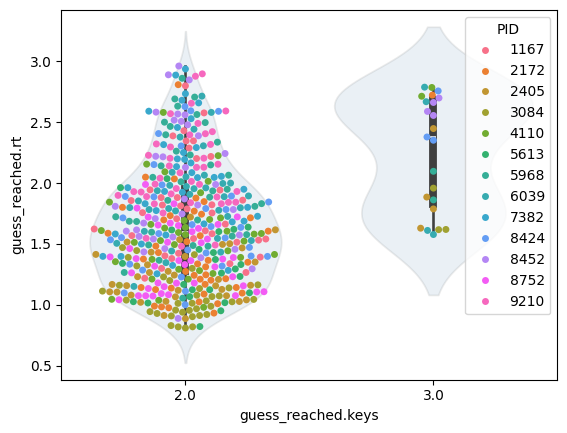

In [8]:
sns.violinplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", alpha=0.1)
sns.swarmplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", hue="PID")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


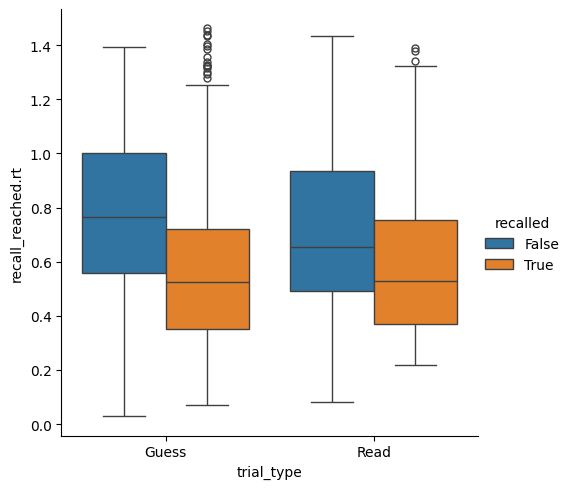

In [7]:
sns.catplot(data = recall, hue = "recalled", kind="box", x="trial_type", y = "recall_reached.rt")

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='trial_type', ylabel='recall_reached.rt'>

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 7.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


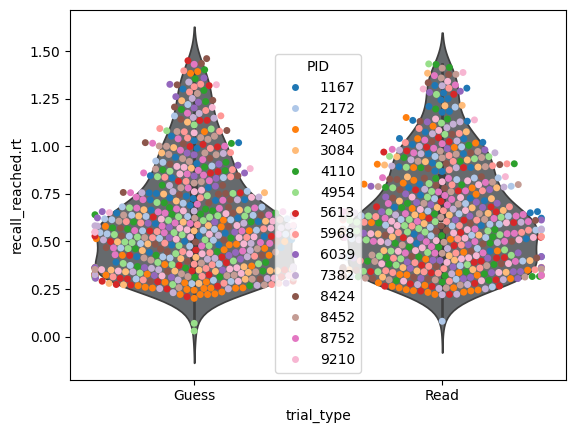

In [8]:
sns.violinplot(data = recall, x="trial_type", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_reached.rt", hue="PID", palette='tab20')

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='trial_type', ylabel='recall_reached.rt'>

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


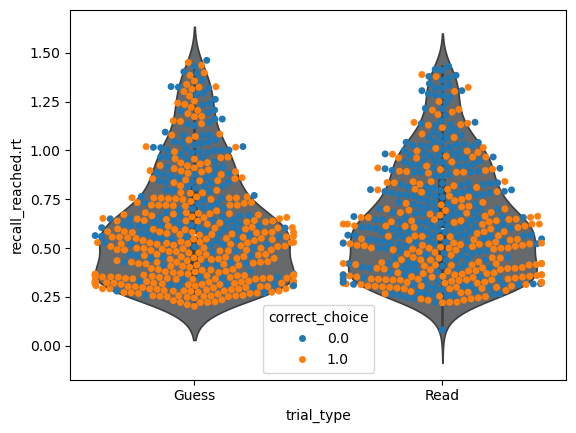

In [20]:
sns.violinplot(data = recall, x="trial_type", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_reached.rt", hue="correct_choice")

<Axes: xlabel='trial_type', ylabel='recall_selection.rt'>

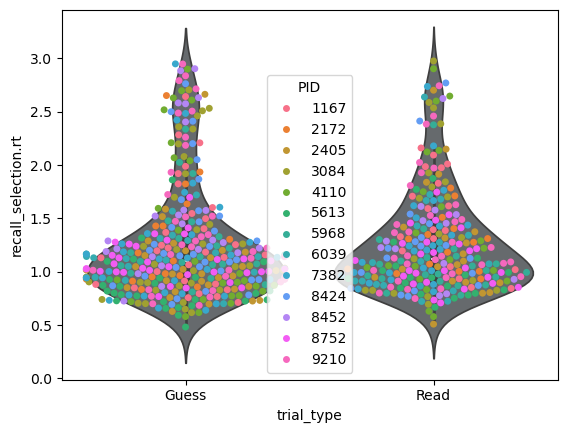

In [22]:
sns.violinplot(data = recall, x="trial_type", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_selection.rt", hue="PID")

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='corr_recalled', ylabel='recall_selection.rt'>

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


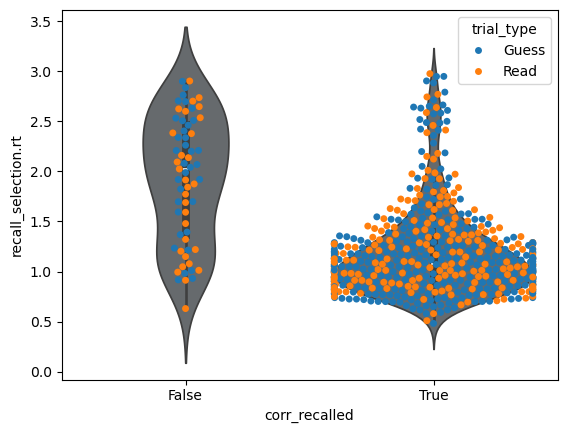

In [24]:
sns.violinplot(data = recall, x="corr_recalled", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="corr_recalled", y = "recall_selection.rt", hue="trial_type")

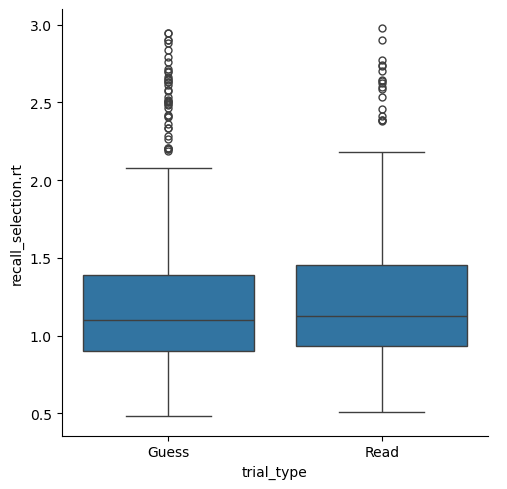

In [26]:
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", kind='box')

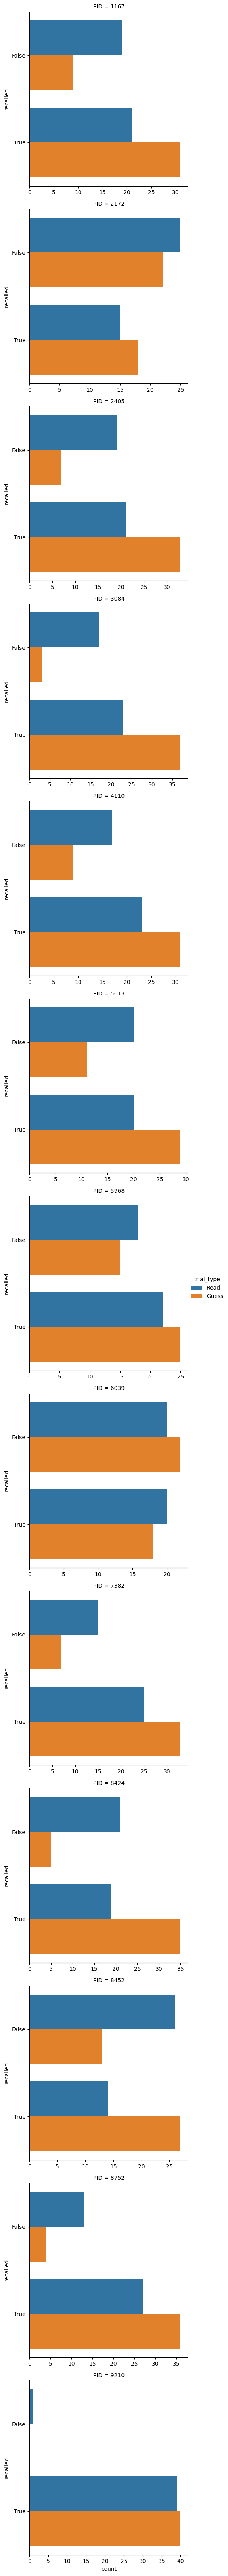

In [28]:
sns.catplot(data = recall, y = "recalled", kind="count", hue="trial_type", row='PID', sharex=False, hue_order=["Read", "Guess"])

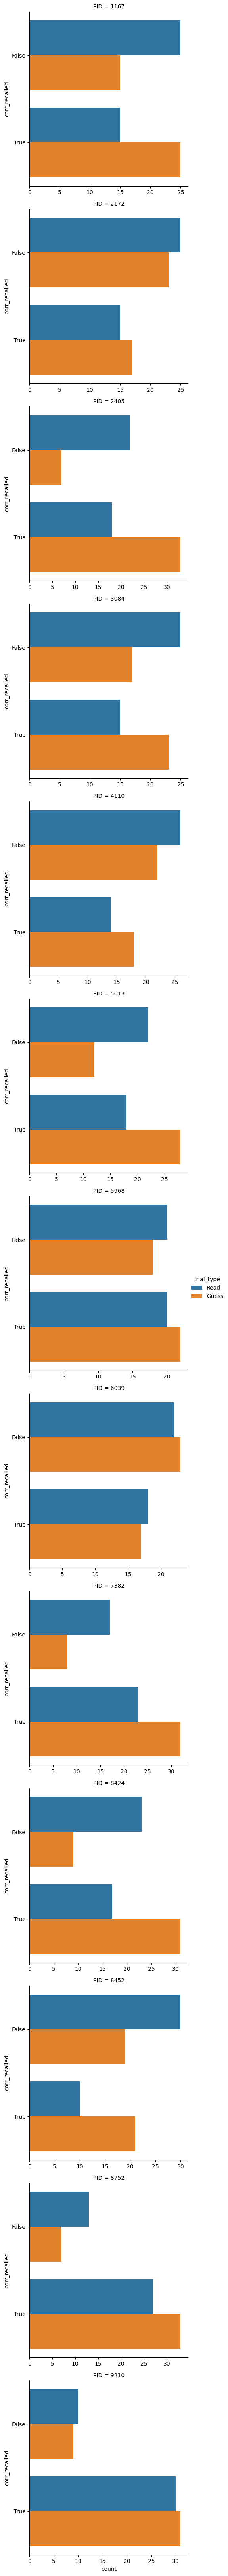

In [30]:
sns.catplot(data = recall, y = "corr_recalled", kind="count", hue="trial_type", row='PID', sharex=False, hue_order=["Read", "Guess"])

In [9]:
recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['recalled']], normalize='index')
recall_sum

trial_type   Guess            Read        
recalled     False   True    False   True 
PID                                       
1167        0.1125  0.3875  0.2375  0.2625
2172        0.2750  0.2250  0.3125  0.1875
2405        0.0875  0.4125  0.2375  0.2625
3084        0.0375  0.4625  0.2125  0.2875
4110        0.1125  0.3875  0.2125  0.2875
4954        0.1750  0.3250  0.3250  0.1750
5613        0.1375  0.3625  0.2500  0.2500
5968        0.1875  0.3125  0.2250  0.2750
6039        0.2750  0.2250  0.2500  0.2500
7382        0.0875  0.4125  0.1875  0.3125
8424        0.0625  0.4375  0.2625  0.2375
8452        0.1625  0.3375  0.3250  0.1750
8752        0.0500  0.4500  0.1625  0.3375
9210        0.0000  0.5000  0.0125  0.4875

In [10]:
recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['recalled']])#.reset_index()
recall_sum['Guess'] = recall_sum['Guess'] / 40
recall_sum['Read'] = recall_sum['Read'] / 40
#recall_sum = recall_sum.stack()
recall_df = recall_sum.stack([0,1], future_stack=True).reset_index()
recall_df.rename(columns = {0:"recall_ratio"}, inplace=True)
recall_df = recall_df[recall_df["recalled"]==True]
recall_df

,PID,trial_type,recalled,recall_ratio
1,1167,Guess,True,0.775
3,1167,Read,True,0.525
5,2172,Guess,True,0.450
7,2172,Read,True,0.375
9,2405,Guess,True,0.825
11,2405,Read,True,0.525
13,3084,Guess,True,0.925
15,3084,Read,True,0.575
17,4110,Guess,True,0.775
19,4110,Read,True,0.575


In [11]:
scp.ttest_rel(recall_sum['Guess'][True], recall_sum['Read'][True])

TtestResult(statistic=5.884343196442859, pvalue=5.372619502892019e-05, df=13)

C:\Users\Asus\AppData\Local\Temp\ipykernel_20980\3937795215.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.pointplot(data=recall_df, x="trial_type", y="recall_ratio", hue="PID", ax=ax, legend=False, color='k', alpha=0.7)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20980\3937795215.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Pretested", "Study-only"])


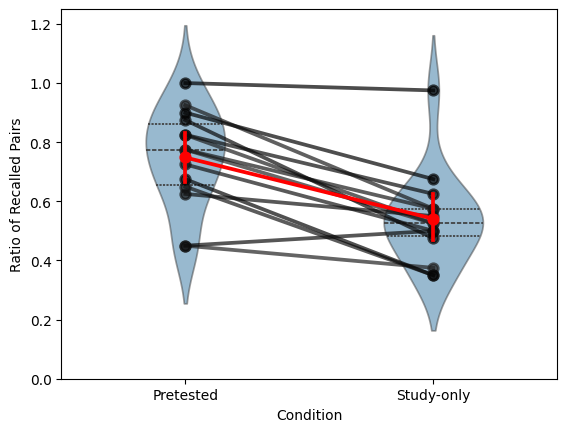

In [12]:
fig, ax = plt.subplots()
#sns.lineplot(data=reacall_df, x="trial_type", y="reacall_df", hue="PID", ax=ax, legend=False)
sns.violinplot(data=recall_df, x="trial_type", y="recall_ratio", ax=ax, alpha=0.5, inner="quart", gap=0.5)
sns.pointplot(data=recall_df, x="trial_type", y="recall_ratio", hue="PID", ax=ax, legend=False, color='k', alpha=0.7)
sns.pointplot(data=recall_df, x="trial_type", y="recall_ratio", units="PID", ax=ax, legend=False, color='r')
ax.set_ylim(0,1.25)
ax.set_ylabel("Ratio of Recalled Pairs")
ax.set_xlabel("Condition")
ax.set_xticklabels(["Pretested", "Study-only"])
fig.savefig("Recall_ratio.png")

In [43]:
corr_recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['corr_recalled']], normalize='index').reset_index()
corr_recall_sum

trial_type       PID   Guess            Read        
corr_recalled          False    True   False    True
0              P1167  0.1875  0.3125  0.3125  0.1875
1              P2172  0.2875  0.2125  0.3125  0.1875
2              P2405  0.0875  0.4125  0.2750  0.2250
3              P3084  0.2125  0.2875  0.3125  0.1875
4              P4110  0.2750  0.2250  0.3250  0.1750
5              P4954  0.2125  0.2875  0.3250  0.1750
6              P5613  0.1500  0.3500  0.2750  0.2250
7              P5968  0.2250  0.2750  0.2500  0.2500
8              P6039  0.2875  0.2125  0.2750  0.2250
9              P7382  0.1000  0.4000  0.2125  0.2875
10             P8424  0.1125  0.3875  0.2875  0.2125
11             P8452  0.2375  0.2625  0.3750  0.1250
12             P8752  0.0875  0.4125  0.1625  0.3375
13             P9210  0.1125  0.3875  0.1250  0.3750

In [44]:
corr_recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['corr_recalled']])#.reset_index()
corr_recall_sum['Guess'] = corr_recall_sum['Guess'] / 40
corr_recall_sum['Read'] = corr_recall_sum['Read'] / 40
#corr_recall_sum = corr_recall_sum.stack()
corr_recall = corr_recall_sum.stack([0,1], future_stack=True).reset_index()
corr_recall.rename(columns = {0:"corr_recall"}, inplace=True)
corr_recall = corr_recall[corr_recall["corr_recalled"]==True]

In [47]:
# data save for teaching
# corr_recall.filter(['PID', 'trial_type', 'corr_recall']).to_csv("test_data_summary.csv", index=False)

C:\Users\Asus\AppData\Local\Temp\ipykernel_20980\205183290.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:k'` for the same effect.

  sns.pointplot(data=corr_recall, x="trial_type", y="corr_recall", hue="PID", ax=ax, legend=False, color='k', alpha=0.7)
C:\Users\Asus\AppData\Local\Temp\ipykernel_20980\205183290.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Pretested", "Study-only"])


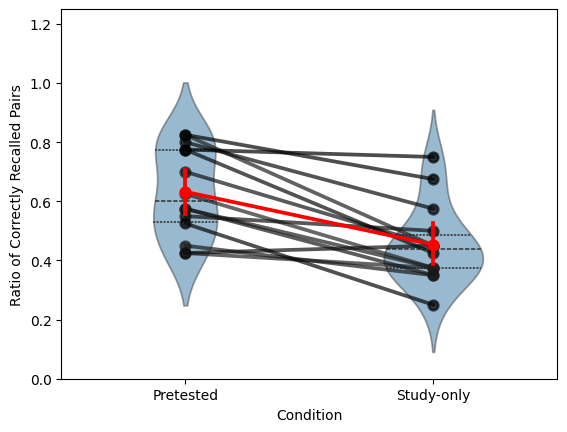

In [16]:
fig, ax = plt.subplots()
#sns.lineplot(data=corr_recall, x="trial_type", y="corr_recall", hue="PID", ax=ax, legend=False)
sns.violinplot(data=corr_recall, x="trial_type", y="corr_recall", ax=ax, alpha=0.5, inner="quart", gap=0.5)
sns.pointplot(data=corr_recall, x="trial_type", y="corr_recall", hue="PID", ax=ax, legend=False, color='k', alpha=0.7)
sns.pointplot(data=corr_recall, x="trial_type", y="corr_recall", units="PID", ax=ax, legend=False, color='r')
ax.set_ylim(0,1.25)
ax.set_ylabel("Ratio of Correctly Recalled Pairs")
ax.set_xlabel("Condition")
ax.set_xticklabels(["Pretested", "Study-only"])
fig.savefig("CorrRecall_ratio.png")

In [17]:
scp.ttest_rel(corr_recall_sum['Guess'][True], corr_recall_sum['Read'][True])

TtestResult(statistic=5.423261445466404, pvalue=0.00011641564173060292, df=13)

In [28]:
corr_recall_sum.columns

Index(['Guess', 'Read'], dtype='object', name='trial_type')

In [118]:
corr_recall_sum[('Guess', True)].describe()

count    13.000000
mean      0.636538
std       0.154992
min       0.425000
25%       0.525000
50%       0.625000
75%       0.775000
max       0.825000
Name: (Guess, True), dtype: float64

In [120]:
corr_recall_sum[('Read', True)].describe()

count    13.000000
mean      0.461538
std       0.136784
min       0.250000
25%       0.375000
50%       0.450000
75%       0.500000
max       0.750000
Name: (Read, True), dtype: float64

In [122]:
print(scp.pearsonr(corr_recall_sum[('Read', True)], corr_recall_sum[('Guess', True)]))

PearsonRResult(statistic=0.624571569777109, pvalue=0.022488217597710584)
